## A notebook to simulate Selim's experiment

In [1]:
import sys, os
import traceback
import regex as re
sys.path.append(os.path.join("..", "spooler_files"))
import numpy as np
import matplotlib.pyplot as plt

Select the appropriate backend

In [2]:
from new_spooler_fermions import add_job

In [3]:
def test_a_job(job_payload, print_result=False):
    """
    Test that the job is properly run.
    """
    job_id = 1
    status_msg_dict = { "job_id": job_id, "status": "None", "detail": "None", "error_message": "None", }
    result_dict = {}
    try:
        result_dict, status_msg_dict = add_job(job_payload, status_msg_dict)
    except Exception as ex:
        tb_list = traceback.format_exc().splitlines()
        for i,elm in enumerate(tb_list):
            tb_list[i] = re.sub(r'File ".*[\\/]([^\\/]+.py)"', r'File "\1"', tb_list[i])
        slimmed_tb = ' '.join(tb_list)
        status_msg_dict["status"] = "ERROR"
        status_msg_dict["detail"] += "; " + slimmed_tb
        status_msg_dict["error_message"] += "; " + slimmed_tb
    if print_result:
        print(status_msg_dict,result_dict)
    return result_dict

In [4]:
# raw values on experiments without interactions from the paper by Murmann et al.
no_int_time = np.array(
    [0.0, 0.84951456, 1.52912621, 2.20873786, 3.05825243, 4.0776699, 4.75728155, 5.26699029, 6.28640777, 6.7961165, 7.64563107, 8.32524272, 9.00485437, 9.85436893, 10.53398058, 11.38349515, 12.0631068, 12.74271845, 13.4223301, 14.27184466, 14.95145631, 15.80097087, 16.48058252, 17.16019417, 18.00970874, 18.68932039, 19.53883495, 20.2184466, 21.06796117, 21.74757282, 22.42718447, 23.27669903, 23.95631068, 24.80582524,]
)

no_int_nR = np.array(
    [0.07042254, 0.56338028, 1.23943662, 1.43661972, 1.8028169, 1.57746479, 1.22535211, 0.81690141, 0.42253521, 0.21126761, 0.07042254, 0.43661972, 0.73239437, 1.33802817, 1.66197183, 1.66197183, 1.36619718, 0.85915493, 0.6056338, 0.07042254, 0.14084507, 0.42253521, 0.67605634, 1.28169014, 1.36619718, 1.54929577, 1.4084507, 1.07042254, 0.57746479, 0.36619718, 0.1971831, 0.28169014, 0.49295775, 0.92957746,]
)

# raw values on experiments with interactions from the paper by Murmann et al.
with_int_time = np.array(
    [-0.16990291, 0.84951456, 1.52912621, 2.03883495, 2.88834951, 3.73786408, 4.41747573, 5.94660194, 5.09708738, 6.62621359, 7.47572816, 8.15533981, 9.00485437, 9.68446602, 10.53398058, 11.21359223, 11.89320388, 12.74271845, 13.4223301, 14.27184466, 14.95145631, 15.63106796, 16.48058252, 17.16019417, 18.00970874, 18.68932039, 19.36893204, 20.2184466, 21.06796117, 21.74757282, 22.42718447, 23.27669903, 23.95631068, 24.63592233, 25.48543689, 26.16504854, 27.01456311, 27.69417476,]
)

with_int_nR = np.array(
    [0.06896552, 0.35862069, 1.00689655, 1.35172414, 1.42068966, 1.35172414, 1.28275862, 1.00689655, 0.85517241, 0.56551724, 0.35862069, 0.57931034, 0.8, 0.8, 0.99310345, 1.2, 1.14482759, 0.99310345, 1.46206897, 1.43448276, 1.48965517, 1.07586207, 0.92413793, 0.75862069, 0.28965517, 0.4, 0.60689655, 0.64827586, 1.42068966, 1.35172414, 1.25517241, 1.35172414, 1.06206897, 0.71724138, 0.42758621, 0.28965517, 0.37241379, 0.35862069,]
)

In [5]:
import json
job_payload1 = {}
job_payload2 = {}
with open('payload_jsons/selim_no_int.json') as job1:
    job_payload1 = json.load(job1)
with open('payload_jsons/selim_w_int.json') as job2:
    job_payload2 = json.load(job2)

In [6]:
result1 = test_a_job(job_payload1, print_result=False)
result2 = test_a_job(job_payload2, print_result=False)

In [7]:
outcomes1 = [exp["data"]["memory"] for exp in result1['results']]
outcomes2 = [exp["data"]["memory"] for exp in result2['results']]

In [8]:
Ntimes1 = len(result1['results'])
times1 = np.linspace(0, 25, Ntimes1) * 1e-3
means_no_int = np.zeros(Ntimes1)
for i in range(Ntimes1):
    means_no_int[i] = np.array(list(map(str.split, outcomes1[i]))).astype("int").sum(axis=1).mean()

In [9]:
Ntimes2 = len(result2['results'])
times2 = np.linspace(0, 25, Ntimes2) * 1e-3
means_int = np.zeros(Ntimes2)
for i in range(Ntimes2):
    means_int[i] = np.array(list(map(str.split, outcomes2[i]))).astype("int").sum(axis=1).mean()

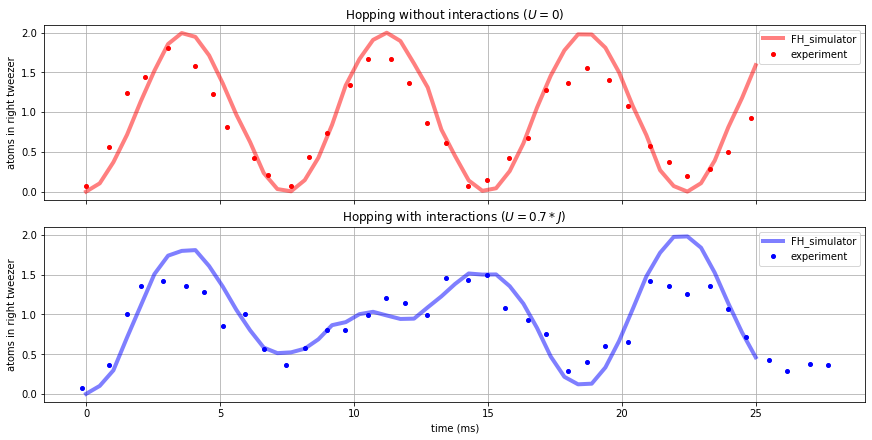

In [10]:
f, (ax1, ax2) = plt.subplots(
    2, 1, sharex=True, sharey=True, figsize=(12, 6), constrained_layout=True
)

ax1.plot(times1 * 1e3, means_no_int, "r-", label="FH_simulator", linewidth=4, alpha=0.5)
ax1.plot(no_int_time, no_int_nR, "ro", label="experiment", markersize=4)

ax2.plot(times2 * 1e3, means_int, "b-", label="FH_simulator", linewidth=4, alpha=0.5)
ax2.plot(with_int_time, with_int_nR, "bo", label="experiment", markersize=4)
ax1.set_ylabel(r"atoms in right tweezer")
ax2.set_ylabel(r"atoms in right tweezer")
ax2.set_xlabel(r"time (ms)")
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
# ax1.set_xlim(-1, 20)
ax1.set_title(r"Hopping without interactions ($U=0$)")
ax2.set_title(r"Hopping with interactions ($U=0.7*J$)")
ax1.grid()
ax2.grid();